## Data Viewer

In [1]:
import importlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
import sys
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import pandas as pd
import numpy as np
import scipy
from scipy import ndimage
from skimage import io, transform
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.patches import Rectangle
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

#import utility_functions as utils

2023-06-30 23:22:09.002581: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-30 23:22:09.130973: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-30 23:22:09.131969: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-30 23:22:10.177616: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
import TPCParser as io
importlib.reload(io)

###############################################
# <> PARSE DATA <> #
path = '/home/kris/Documents/coding/WAWTPC/krisTPCReco/TPCReco-kris/build/resources/'
filename = 'C12_ALPHA_1k_131MeV_250mbar_.root'

projections = io.parseChargeMaps(path+filename)


In [3]:
import TPCParser as io
importlib.reload(io)
normMergedImage = io.getMergedImages(projections)


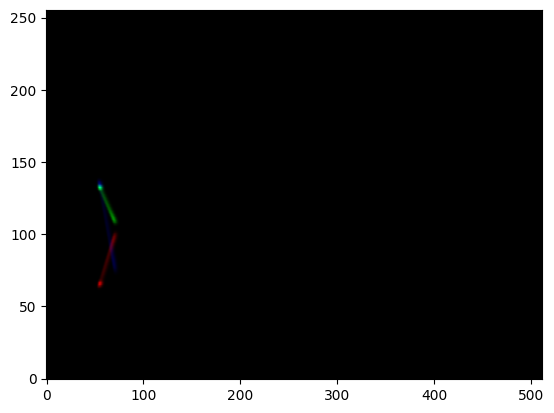

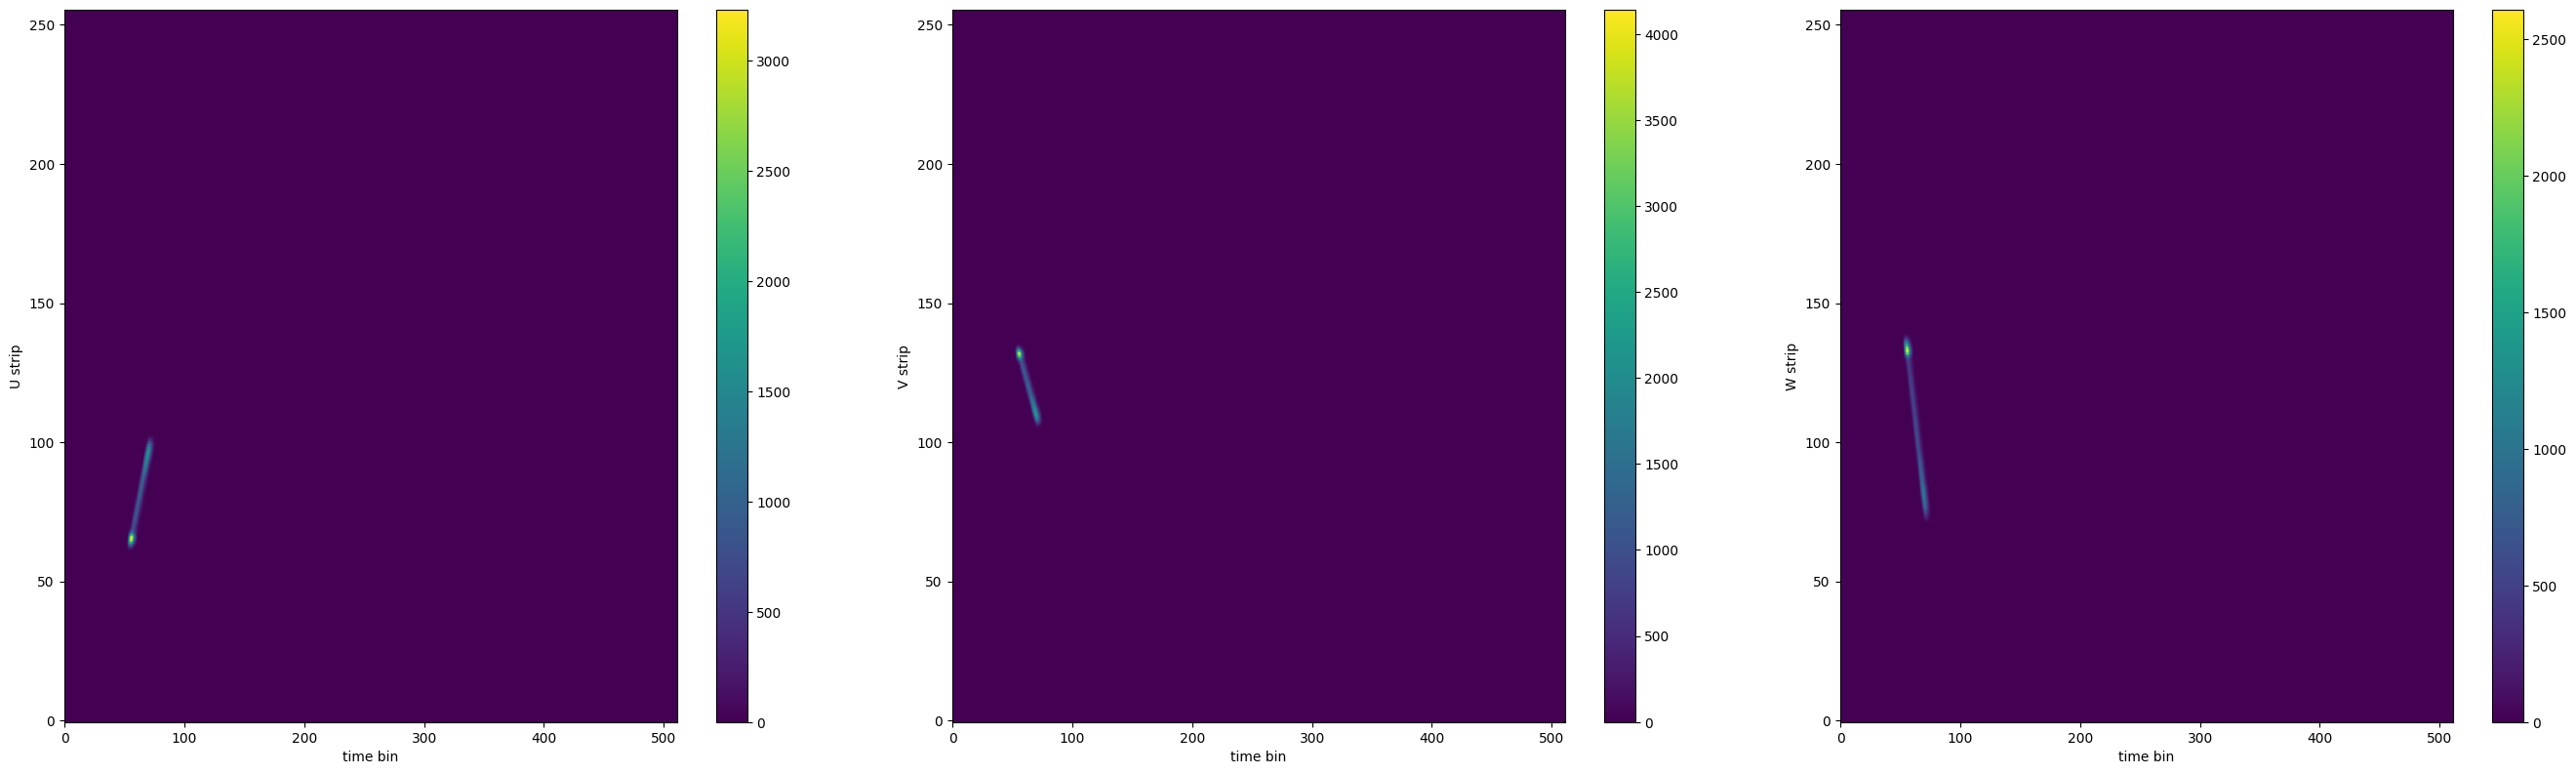

In [4]:
###############################################
# <> SETUP PLOT <> #
event = 0

fig, axis = plt.subplots()
im = axis.imshow(normMergedImage[event], origin='lower', aspect='auto')

###############################################
# <> SETUP PLOT <> #

projNames = ("U", "V", "W")
fig2, axes2 = plt.subplots(1,3, figsize=(28,10))
for strip in range(0,3):
    axis2 = axes2[strip] 
    data = projections[event][:,:,strip]
    im2 = axis2.imshow(data, origin='lower', aspect='auto')    
    axis2.set_xlabel("time bin")
    axis2.set_ylabel(projNames[strip]+" strip")
    divider = make_axes_locatable(axis2)
    cax = divider.append_axes("right", size="5%", pad=0.4)
    fig2.colorbar(im2, cax=cax)
    plt.subplots_adjust(bottom=0.15, left=0.05, right=0.95, wspace=0.3)

## Training Dataset preparation

In [4]:


from __future__ import print_function, division
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn
import numpy as np
import torchvision
from torchvision import datasets,models,transforms       
from torch.utils.data import DataLoader, random_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import time
import os
import copy
import torch.nn.functional as F
cudnn.benchmark = True
plt.ion()




In [5]:
print(len(normMergedImage))             # entries
print(len(normMergedImage[0]))          # strips
print(len(normMergedImage[0][0]))       # timebins
print(len(normMergedImage[0][0][0]))    # channels

1000
256
512
3


In [10]:
#data_transforms = {'train':transforms.Compose([transforms.ToTensor])}

import TPCParser as io
importlib.reload(io)

tensor_data = torch.from_numpy(np.array(normMergedImage))
tensor_data = tensor_data.float()



In [25]:
import TPCParser as io
importlib.reload(io)
data = io.padTensorData(tensor_data)


128
128
0
0


In [26]:
print(tensor_data.shape)
print(data.shape)

torch.Size([1000, 256, 512, 3])
torch.Size([1000, 512, 512, 3])


In [ ]:

# <> PADDING <> #
pad_height = max_dim - tensor_data.size(1)
pad_width = max_dim - tensor_data.size(2)
top_pad  =pad_height//2
bottom_pad =pad_height-top_pad
left_pad = pad_width//2
right_pad = pad_width-left_pad

padded_data = F.pad(tensor_data,(0,0,left_pad,right_pad,top_pad,bottom_pad))


print(padded_data.shape)

image_index = 0
image = padded_data[image_index]
plt.imshow(image)
plt.axis('off')
plt.show()




print(torch.min(padded_data))
print(torch.max(padded_data))

In [ ]:
num_classes = 3
resnet_model = models.resnet50(pretrained=True)